# Kaggle house prices with fastai v2
> Kaggling with fastai2

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
import pandas as pd
from fastai2.tabular.all import *
from fastai2 import metrics
from sklearn import ensemble
import shap
from kaggle_house_prices.utils import *
from kaggle_house_prices.preprocessing import *
from kaggle_house_prices.modelling import *
from kaggle_house_prices.inspection import *

## Get leaderboard and competition data

In [ ]:
# !kaggle competitions leaderboard {competition} -d -p {dir_leaderboard}

In [ ]:
# !kaggle competitions download -c {competition} -p {dir_raw_data}

In [ ]:
# extract_zip_files(compressed_leaderboard_file)

In [ ]:
# extract_zip_files(compressed_data_file)

## Preprocessing

In [ ]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
display_all(df_test.head().T)

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [ ]:
show_na_share(df, cont_names)

MasVnrArea: 0.55 %
GarageYrBlt: 5.55 %
LotFrontage: 17.74 %


In [ ]:
df = impute_continuous(df, cont_names)

In [ ]:
show_na_share(df, cat_names)

Alley: 93.77 %
MasVnrType: 0.55 %
BsmtQual: 2.53 %
BsmtCond: 2.53 %
BsmtExposure: 2.60 %
BsmtFinType1: 2.53 %
BsmtFinType2: 2.60 %
Electrical: 0.07 %
FireplaceQu: 47.26 %
GarageType: 5.55 %
GarageFinish: 5.55 %
GarageQual: 5.55 %
GarageCond: 5.55 %
PoolQC: 99.52 %
Fence: 80.75 %
MiscFeature: 96.30 %


In [ ]:
df = impute_categorical(df, cat_names)

In [ ]:
df = get_split(df, valid_pct=.2)
display(df["valid"].value_counts())

False    1168
True      292
Name: valid, dtype: int64

In [ ]:
df[dep_var] = df[dep_var].apply(np.log)

In [ ]:
procs = [Categorify, FillMissing, Normalize]

In [ ]:
splits = ColSplitter(col="valid")(df)

In [ ]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=dep_var, splits=splits)

In [ ]:
display_all(df.iloc[splits[1]][cat_names].head())

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotArea_na,YearBuilt_na,YearRemodAdd_na,MasVnrArea_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,1stFlrSF_na,2ndFlrSF_na,GrLivArea_na,GarageYrBlt_na,GarageArea_na,WoodDeckSF_na,OpenPorchSF_na,LotFrontage_na,BsmtFinSF1_na,LowQualFinSF_na
1168,1169,70,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,Hip,CompShg,Stucco,Stucco,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,7,Typ,2,TA,Basment,Unf,2,TA,TA,Y,0,0,90,0,NA,NA,NA,0,7,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1169,1170,60,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,Gd,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,Fin,3,TA,TA,Y,0,0,0,0,NA,NA,NA,0,7,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1170,1171,80,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,Av,ALQ,Unf,GasA,TA,Y,SBrkr,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,Fin,1,TA,TA,Y,0,0,0,576,Gd,GdPrv,NA,0,7,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1171,1172,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,0,288,0,NA,NA,Shed,1400,11,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1172,1173,160,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,2,1,Gd,5,Typ,0,NA,Detchd,Fin,2,TA,TA,Y,0,0,0,0,NA,NA,NA,0,3,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
display_all(to.valid.xs[cat_names].head())

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotArea_na,YearBuilt_na,YearRemodAdd_na,MasVnrArea_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,1stFlrSF_na,2ndFlrSF_na,GrLivArea_na,GarageYrBlt_na,GarageArea_na,WoodDeckSF_na,OpenPorchSF_na,LotFrontage_na,BsmtFinSF1_na,LowQualFinSF_na
1168,0,7,4,2,2,4,4,1,1,1,8,3,3,1,6,6,7,4,1,10,12,4,4,5,2,5,5,5,6,7,1,1,2,5,1,1,3,1,5,2,3,6,7,3,6,3,4,3,6,6,3,1,1,5,1,3,5,2,1,7,9,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1169,0,6,4,2,2,1,4,1,2,1,16,3,3,1,6,10,5,4,1,6,6,2,3,3,3,1,5,2,3,7,1,1,2,5,2,1,4,2,5,2,3,9,7,2,6,2,1,4,6,6,3,1,1,1,1,3,5,2,1,7,9,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1170,0,9,4,2,2,4,4,1,5,1,12,3,3,1,8,6,6,2,1,8,10,4,4,5,2,5,5,1,1,7,1,5,2,5,2,1,2,1,4,2,4,5,7,2,5,2,1,2,6,6,3,1,1,1,0,0,1,2,1,7,9,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1171,0,1,4,2,2,4,4,1,5,1,13,3,3,1,3,6,6,4,1,7,8,4,4,5,2,5,5,5,1,7,1,1,2,5,2,1,2,1,4,2,4,5,7,2,6,2,3,3,6,6,3,1,1,0,1,3,5,4,0,11,9,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1172,0,13,2,2,3,1,4,1,5,1,22,3,3,5,6,7,5,2,1,7,8,4,3,5,3,3,5,5,7,7,1,1,2,5,1,1,3,2,3,2,3,4,7,1,4,6,1,3,6,6,3,1,1,1,1,3,5,2,1,3,9,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
dls = to.dataloaders()

## Fitting a deep net model using `TabularLearner`

In [ ]:
loss_fun = torch.nn.functional.mse_loss

In [ ]:
y_range = [min(to.valid.ys.values.min(), to.train.ys.values.min()), 
           max(to.valid.ys.values.max(), to.train.ys.values.max())]; y_range

[10.460242108190519, 13.534473028231162]

In [ ]:
%%time
learn = tabular_learner(dls, n_out=1, loss_func=loss_fun, config=dict(active_fun=Mish),
                        y_range=y_range)

CPU times: user 78.1 ms, sys: 0 ns, total: 78.1 ms
Wall time: 26.1 ms


CPU times: user 21.2 s, sys: 17.9 s, total: 39.2 s
Wall time: 5.82 s


(0.006918309628963471, 3.019951861915615e-07)

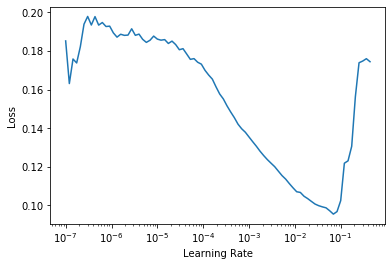

In [ ]:
%%time
learn.lr_find()

In [ ]:
%%time
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.096877,0.107682,00:01
1,0.055077,0.090318,00:01
2,0.036028,0.079071,00:01
3,0.024554,0.053626,00:01
4,0.017457,0.032267,00:01


CPU times: user 23.7 s, sys: 20.3 s, total: 44 s
Wall time: 6.6 s


In [ ]:
y_pred, y_true = learn.get_preds()

y_pred[:5], y_true[:5]

(tensor([[12.1513],
         [12.8520],
         [11.8932],
         [11.9280],
         [11.9397]]),
 tensor([[12.3673],
         [13.3455],
         [12.0494],
         [12.0015],
         [12.0547]]))

,TeamId,TeamName,SubmissionDate,Score
7590,4210573,hsuanpingsun,2020-01-04 03:44:55,0.0
10044,4278029,Muhammet İkbal Elek,2020-01-20 13:09:34,0.0
9856,3740535,wentixiaogege,2020-01-19 03:37:57,0.0
4988,4155989,terracoda,2019-12-20 12:56:53,0.0
15086,2248598,predictor!,2020-02-15 13:51:49,0.0


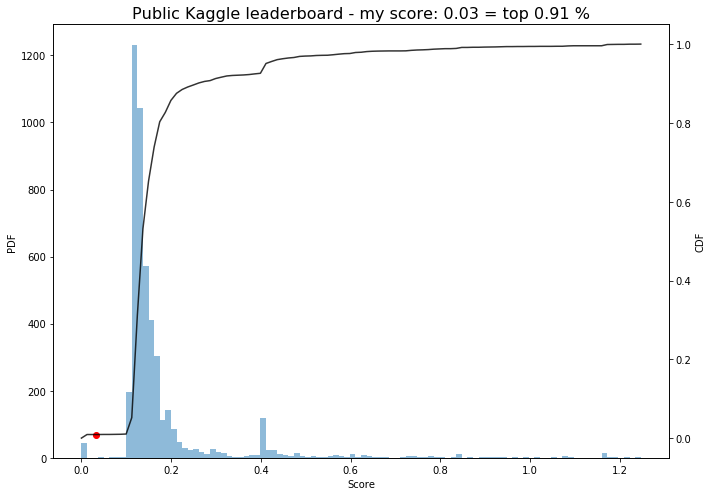

In [ ]:
my_score = loss_fun(y_pred, y_true).item()

show_leaderboard(fname_leaderboard, score_bounds=(None, 1.25), bins=100, user_score=my_score, user="my")

Computing SHAP values

In [ ]:
model = FastaiModel(learn, to)

In [ ]:
%%time
X = torch.from_numpy(to.valid.xs.values)
explainer = shap.DeepExplainer(model, X)
shap_values = explainer.shap_values(X)

CPU times: user 53.5 s, sys: 47 s, total: 1min 40s
Wall time: 15.1 s


## Fitting an ensemble method using `RandomForestRegressor`

In [ ]:
ens = ensemble.RandomForestRegressor(n_estimators=100, max_features="sqrt", max_samples=.9, oob_score=True)

In [ ]:
%%time
ens.fit(to.train.xs.values, to.train.ys.values.ravel())

CPU times: user 312 ms, sys: 0 ns, total: 312 ms
Wall time: 299 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=0.9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
%%time
y_pred_ens = ens.predict(to.valid.xs.values)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 14.3 ms


,TeamId,TeamName,SubmissionDate,Score
7590,4210573,hsuanpingsun,2020-01-04 03:44:55,0.0
10044,4278029,Muhammet İkbal Elek,2020-01-20 13:09:34,0.0
9856,3740535,wentixiaogege,2020-01-19 03:37:57,0.0
4988,4155989,terracoda,2019-12-20 12:56:53,0.0
15086,2248598,predictor!,2020-02-15 13:51:49,0.0


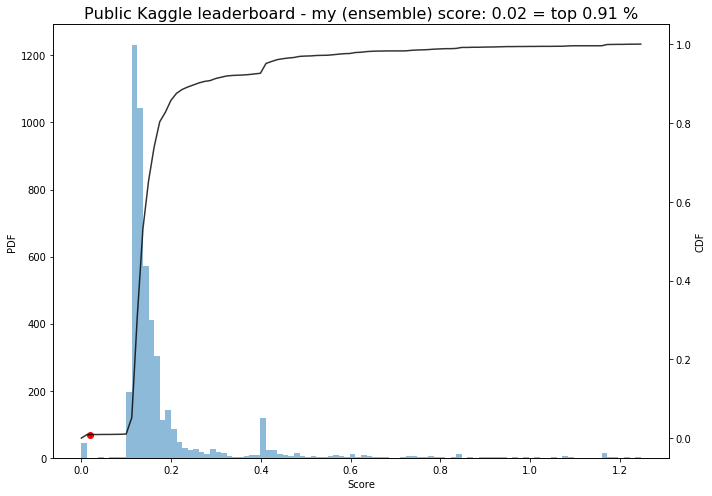

In [ ]:
my_score_ens = loss_fun(torch.from_numpy(y_pred_ens[:,None]).float(), y_true).item()

show_leaderboard(fname_leaderboard, score_bounds=(None, 1.25), bins=100, user_score=my_score_ens, 
                 user="my (ensemble)")

Computing SHAP values

In [ ]:
%%time
_X = X.detach().numpy()
ens_explainer = shap.TreeExplainer(ens, _X)
ens_shap_values = ens_explainer.shap_values(_X)

 99%|===================| 289/292 [00:30<00:00]        

CPU times: user 29.8 s, sys: 15.6 ms, total: 29.8 s
Wall time: 29.8 s


## SHAP summary plots

In [ ]:
#hide
shap.initjs()

### Deep net

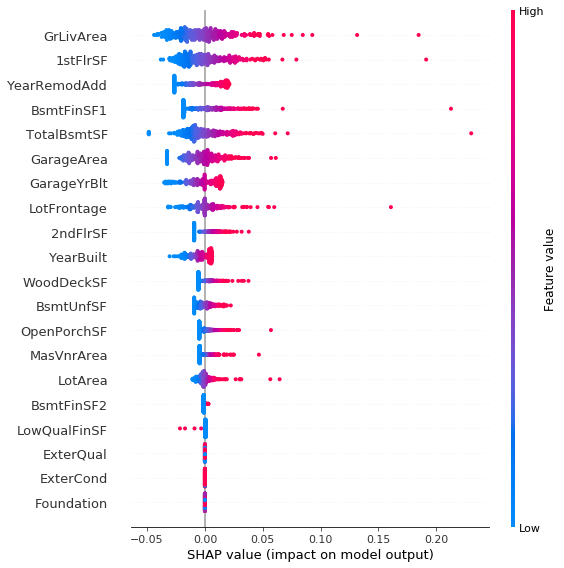

In [ ]:
shap.summary_plot(shap_values, to.valid.xs)

### Ensemble

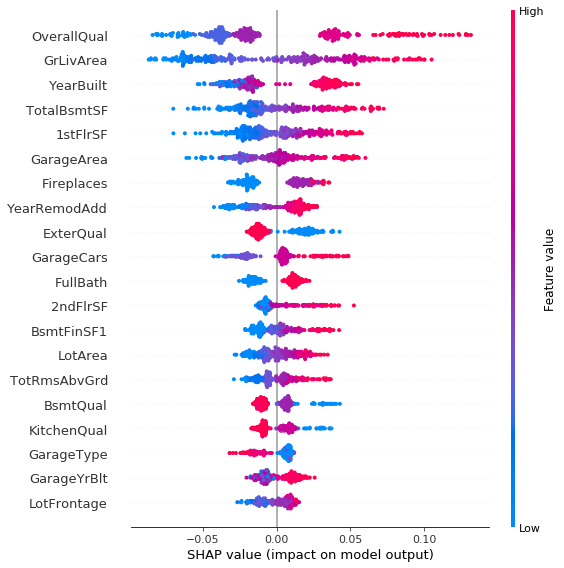

In [ ]:
shap.summary_plot(ens_shap_values, to.valid.xs)